In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import symbols, expand

In [ ]:
df = pd.read_csv(r"/content/nonlinear_dataset.csv")

In [ ]:
df

,x,y
0,-10.000000,103.027592
1,-9.899497,97.765818
2,-9.798995,99.624289
3,-9.698492,101.946215
4,-9.597990,91.122991
...,...,...
195,9.597990,93.875651
196,9.698492,89.371159
197,9.798995,96.423384
198,9.899497,97.834005


In [ ]:
x_points = df['x'] # banyak data
y_points = df['y'] # banyak data

x_points = x_points[:10]                      # sedikit data
y_points = y_points[:10]                      # sedikit data

In [ ]:
# Menghitung tabel selisih terbagi
n = len(x_points)
divided_diff = np.zeros((n, n))
divided_diff[:, 0] = y_points  # Kolom pertama adalah y_points


for j in range(1, n):
    for i in range(n - j):
        divided_diff[i][j] = (divided_diff[i + 1][j - 1] - divided_diff[i][j - 1]) / (x_points[i + j] - x_points[i])

# Tampilkan tabel selisih terbagi
print("\nTabel Selisih Terbagi:")
print(pd.DataFrame(divided_diff))


Tabel Selisih Terbagi:
            0           1           2            3             4  \
0  103.027592  -52.354650  352.461024 -1092.906125  -2839.090359   
1   97.765818   18.491787   22.941589 -2234.248983  14521.818903   
2   99.624289   23.103162 -650.701320  3603.668164  -8849.089825   
3  101.946215 -107.691074  435.831795    46.245119  -9177.861490   
4   91.122991  -20.086693  449.775046 -3643.347440  13555.584961   
5   89.104228   70.320352 -648.721669  1806.133952    968.051060   
6   96.171600  -60.075964 -104.158669  2195.300207      0.000000   
7   90.133815  -81.012379  557.740891     0.000000      0.000000   
8   81.991867   31.096342    0.000000     0.000000      0.000000   
9   85.117128    0.000000    0.000000     0.000000      0.000000   

              5              6              7              8            9  
0  34548.209432 -134418.393688  299152.956208 -371954.331940  34511.64415  
1 -46508.108370   76040.972488      94.196859 -340737.769392      0.00000  

In [ ]:
# Ambil koefisien dari tabel selisih terbagi
coefs = divided_diff[0, :]

# Membuat rumus polinomial Newton
x_sym = symbols('x')
poly_expr = coefs[0]
product = 1.0

for i in range(1, len(coefs)):
    product *= (x_sym - x_points[i - 1])
    poly_expr += coefs[i] * product

# Sederhanakan rumus polinomial
poly_expr = expand(poly_expr)                 # KALAU DATANYA BANYAK, SILAHKAN DI COMMENT
print("\nRumus Polinomial Newton:")           # KALAU DATANYA BANYAK, SILAHKAN DI COMMENT
print(poly_expr)                              # KALAU DATANYA BANYAK, SILAHKAN DI COMMENT


Rumus Polinomial Newton:
34511.6441503107*x**9 + 2609227.39139556*x**8 + 86032463.1246141*x**7 + 1613279357.97237*x**6 + 18762236307.2724*x**5 + 137715873221.88*x**4 + 613319118011.726*x**3 + 1434506464861.06*x**2 + 864155905682.168*x - 1790892624493.39


In [ ]:
# Evaluasi polinomial di seluruh rentang x_points
x_eval = np.linspace(min(x_points), max(x_points), 1000)
y_eval = []

for x in x_eval:
    result = coefs[0]
    product = 1.0
    for i in range(1, len(coefs)):
        product *= (x - x_points[i - 1])
        result += coefs[i] * product
    y_eval.append(result)

In [ ]:
# Hitung galat untuk setiap titik data
errors = []
for i in range(len(x_points)):
    result = coefs[0]
    product = 1.0
    for j in range(1, len(coefs)):
        product *= (x_points[i] - x_points[j - 1])
        result += coefs[j] * product
    errors.append(y_points[i] - result)

# Tampilkan galat untuk setiap titik data
print("\nNilai Galat untuk setiap titik data:")
for i in range(len(x_points)):
    print(f"x = {x_points[i]:.4f}, Galat = {errors[i]:.4e}")

# Hitung error rata-rata
mean_error = np.mean(np.abs(errors))  # Menggunakan nilai absolut
print(f"\nError rata-rata: {mean_error:.4e}")


Nilai Galat untuk setiap titik data:
x = -10.0000, Galat = 0.0000e+00
x = -9.8995, Galat = 0.0000e+00
x = -9.7990, Galat = 0.0000e+00
x = -9.6985, Galat = 0.0000e+00
x = -9.5980, Galat = 0.0000e+00
x = -9.4975, Galat = -1.4211e-14
x = -9.3970, Galat = 4.2633e-14
x = -9.2965, Galat = 2.8422e-14
x = -9.1960, Galat = 4.8317e-13
x = -9.0955, Galat = 1.4495e-12

Error rata-rata: 2.0179e-13


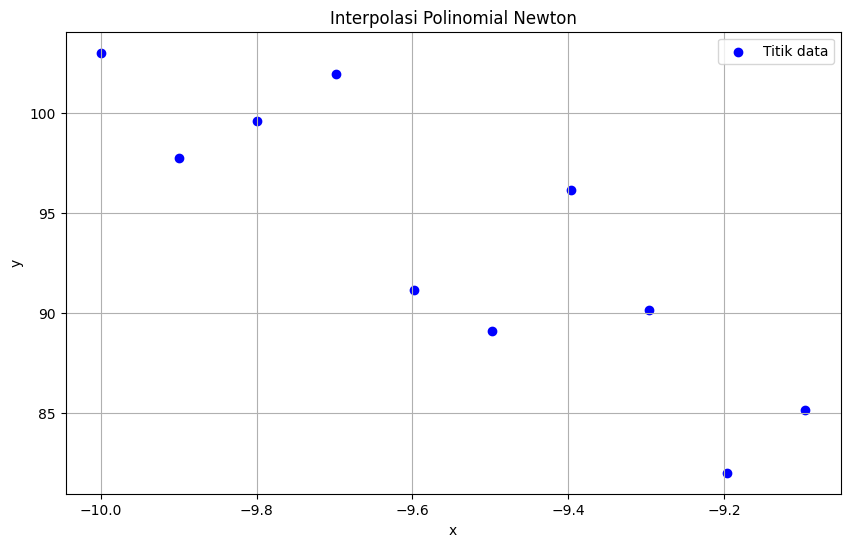

In [ ]:
# Plot hasil interpolasi
plt.figure(figsize=(10, 6))
plt.scatter(x_points, y_points, color="blue", label="Titik data")
plt.title("Interpolasi Polinomial Newton")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

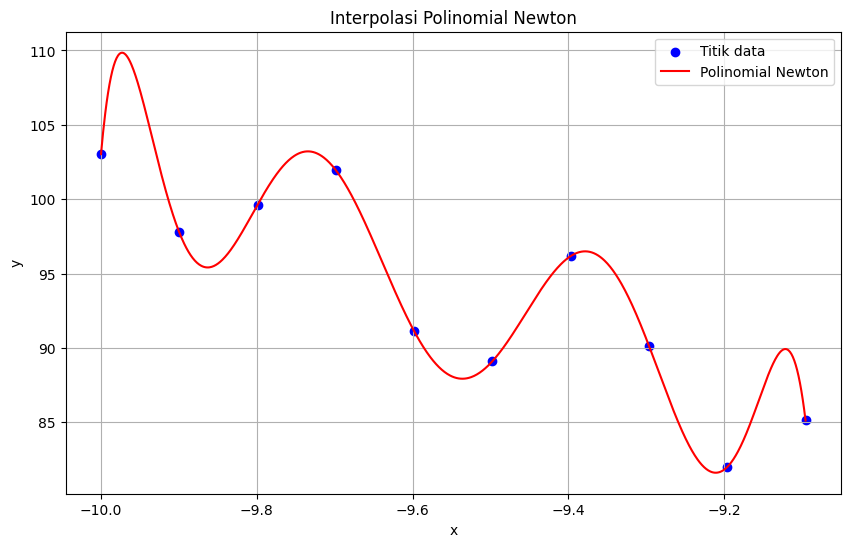

In [ ]:
# Plot hasil interpolasi
plt.figure(figsize=(10, 6))
plt.scatter(x_points, y_points, color="blue", label="Titik data")
plt.plot(x_eval, y_eval, label="Polinomial Newton", color="red")
plt.title("Interpolasi Polinomial Newton")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

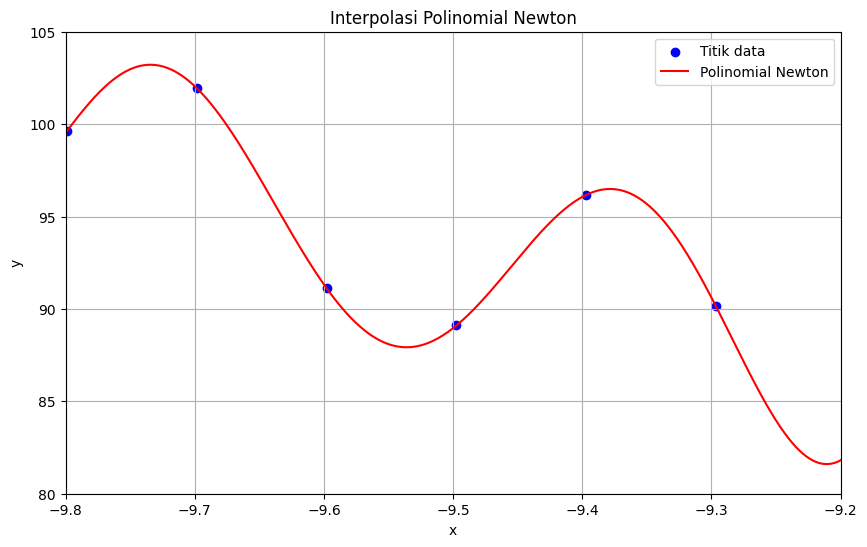

In [ ]:
# Plot hasil interpolasi (ZOOM)
plt.figure(figsize=(10, 6))
plt.scatter(x_points, y_points, color="blue", label="Titik data")
plt.plot(x_eval, y_eval, label="Polinomial Newton", color="red")
plt.title("Interpolasi Polinomial Newton")
plt.xlabel("x")
plt.ylabel("y")

plt.xlim(-9.8, -9.2)
plt.ylim(80, 105)

plt.legend()
plt.grid()
plt.show()

In [ ]:
# Meminta input nilai x dari pengguna
x_input = float(input("Masukkan nilai x untuk prediksi: "))

# Hitung nilai y menggunakan polinomial Newton
y_pred = coefs[0]
product = 1.0

for i in range(1, len(coefs)):
    product *= (x_input - x_points[i - 1])
    y_pred += coefs[i] * product

# Tampilkan hasil prediksi
print(f"\nNilai y yang diprediksi untuk x = {x_input:.4f} adalah y = {y_pred:.4f}")

ALGORITMA InterpolasiNewton

INPUT:
- File CSV yang berisi data x dan y
- Jumlah data yang akan digunakan (n)
- Nilai x yang akan diprediksi (x_input)

PROSES:
1. Baca data dari file CSV ke dalam array x_points dan y_points
2. Batasi data sesuai jumlah yang diinginkan (n)

3. Hitung tabel selisih terbagi:
   - Inisialisasi matriks divided_diff berukuran n x n dengan nilai 0
   - Isi kolom pertama dengan nilai y_points
   - UNTUK j = 1 SAMPAI n-1
     - UNTUK i = 0 SAMPAI n-j-1
       divided_diff[i][j] = (divided_diff[i+1][j-1] - divided_diff[i][j-1]) / (x_points[i+j] - x_points[i])

4. Ambil koefisien dari baris pertama tabel selisih terbagi (coefs)

5. Hitung galat untuk setiap titik data:
   UNTUK i = 0 SAMPAI n-1
     result = coefs[0]
     product = 1.0
     UNTUK j = 1 SAMPAI jumlah_coefs-1
       product = product * (x_points[i] - x_points[j-1])
       result = result + (coefs[j] * product)
     errors[i] = y_points[i] - result

6. Hitung error rata-rata dari nilai absolut errors

7. Buat kurva interpolasi:
   - Buat array x_eval dengan nilai dari min(x_points) sampai max(x_points)
   - UNTUK setiap x dalam x_eval
     - Hitung nilai y menggunakan polinomial Newton
     - Simpan hasilnya di array y_eval

8. Hitung prediksi untuk x_input:
   result = coefs[0]
   product = 1.0
   UNTUK i = 1 SAMPAI jumlah_coefs-1
     product = product * (x_input - x_points[i-1])
     result = result + (coefs[i] * product)
   y_pred = result

OUTPUT:
1. Tabel selisih terbagi
2. Nilai galat untuk setiap titik data
3. Error rata-rata
4. Rumus polinomial Newton (opsional untuk data banyak)
5. Grafik interpolasi (normal dan zoom)
6. Nilai prediksi y untuk x_input

VISUALISASI:
1. Plot titik data asli (scatter plot)
2. Plot kurva interpolasi
3. Plot versi zoom untuk detail